In [1]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\df_limpio.csv")
df['DATE'] = pd.to_datetime(df['DATE'])  # Convertir la columna a tipo datetime si no lo está
df = df.sort_values(by='DATE', ascending=True)  # Ordenar de más antiguo a más reciente
df


,Unnamed: 0,index,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,...,STR_CLINCH_A_x,STR_CLINCH_A_y,STR_CLINCH_B_x,STR_CLINCH_B_y,STR_GROUND_A_x,STR_GROUND_A_y,STR_GROUND_B_x,STR_GROUND_B_y,TITLE_FIGHT,WOMEN
0,0,2517,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,0,KO/TKO,412,1,...,0,0,0,0,14,26,0,0,False,False
1,1,2516,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,0,Submission,477,1,...,14,21,0,0,0,0,4,12,False,False
2,2,2515,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,0,Decision - Unanimous,180,2,...,19,37,14,18,2,9,0,0,False,False
3,3,2514,Tito Ortiz,Jerry Bohlander,1999-01-08,MIDDLEWEIGHT,0,TKO - Doctor's Stoppage,151,2,...,7,12,1,4,18,35,1,1,False,False
4,4,2513,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,0,Decision - Split,180,2,...,1,1,0,1,0,0,18,29,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,7833,2528,Jonathan Micallef,Kevin Jousset,2025-02-15,WELTERWEIGHT,0,Decision - Unanimous,300,3,...,2,2,1,2,0,0,0,0,False,False
7832,7832,2529,Quillan Salkilld,Anshul Jubli,2025-02-15,LIGHTWEIGHT,0,KO/TKO,19,1,...,0,0,0,0,1,1,0,0,False,False
7842,7842,2518,Dricus Du Plessis,Sean Strickland,2025-02-15,MIDDLEWEIGHT,0,Decision - Unanimous,300,5,...,0,0,0,0,0,0,0,0,True,False
7836,7836,2525,Wang Cong,Bruna Brasil,2025-02-15,FLYWEIGHT,0,Decision - Unanimous,300,3,...,0,1,1,1,1,3,0,0,False,True


In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'Peleador_A', 'Peleador_B', 'DATE', 'CATEGORY',
       'WINNER', 'METHOD', 'TIME', 'ROUND', 'KD_A', 'KD_B', 'SIG_STR_A',
       'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B',
       'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_A_y',
       'TOTAL_STR_B_x', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y', 'TD_B_x',
       'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_A_y', 'STR_HEAD_B_x',
       'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_A_y', 'STR_BODY_B_x',
       'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_A_y', 'STR_LEG_B_x',
       'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_A_y',
       'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y', 'TITLE_FIGHT',
       'WOMEN'],
      dtype='object')

In [3]:
# Eliminar la columna de índice 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Eliminar columnas redundantes con sufijos '_x' y '_y'
df = df.drop(columns=[col for col in df.columns if '_x' in col or '_y' in col])


In [4]:
df.columns

Index(['index', 'Peleador_A', 'Peleador_B', 'DATE', 'CATEGORY', 'WINNER',
       'METHOD', 'TIME', 'ROUND', 'KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B',
       'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B',
       'CTRL_A', 'CTRL_B', 'TITLE_FIGHT', 'WOMEN'],
      dtype='object')

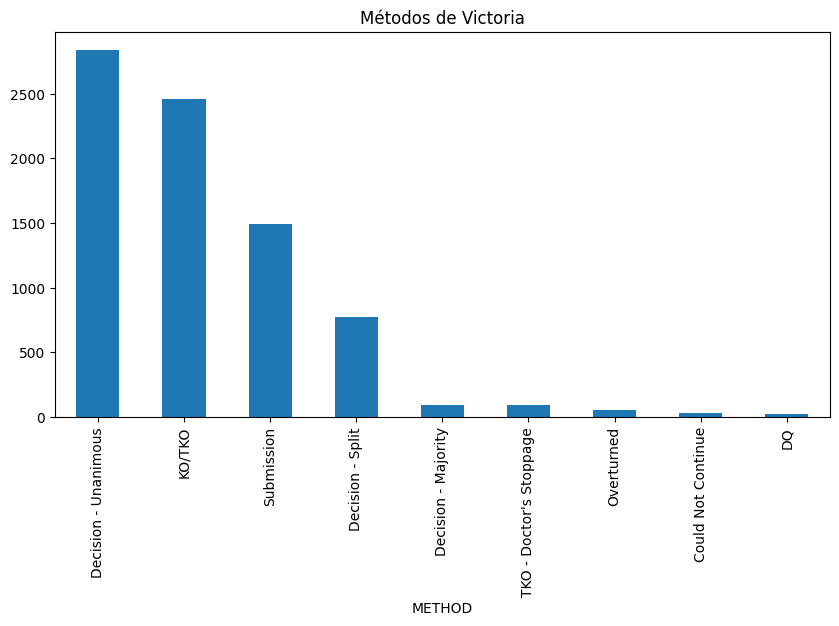

In [18]:
# Distribución de métodos de victoria
df['METHOD'].value_counts().plot(kind='bar', figsize=(10, 5), title="Métodos de Victoria")
plt.show()


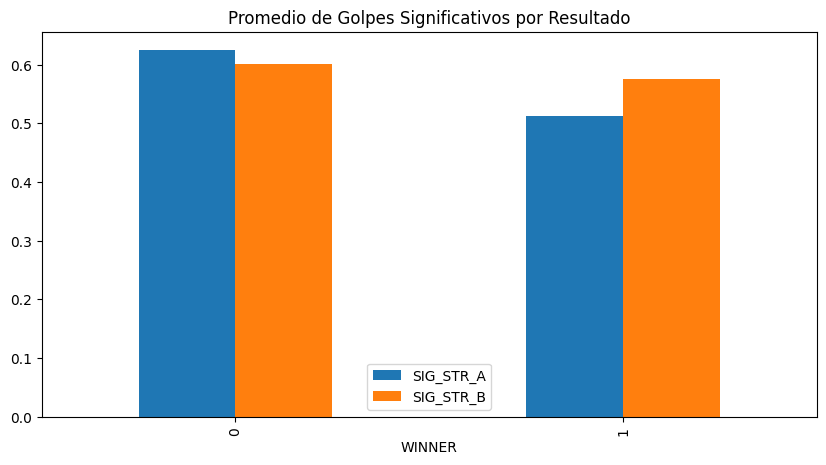

In [19]:
# Comparar golpes significativos por resultado
df[['WINNER', 'SIG_STR_A', 'SIG_STR_B']].groupby('WINNER').mean().plot(kind='bar', figsize=(10,5))
plt.title("Promedio de Golpes Significativos por Resultado")
plt.show()


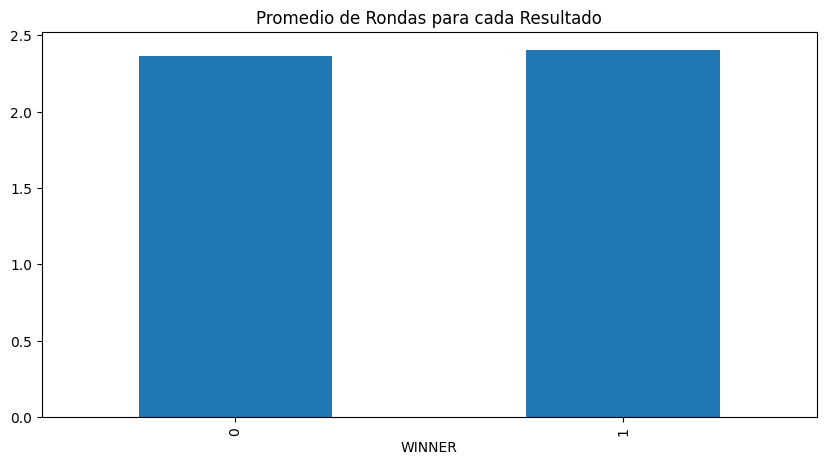

In [20]:
# Promedio de rondas en que ocurre la victoria
df['ROUND'] = df['ROUND'].astype(int)  # Asegurarnos de que la columna es numérica
df.groupby('WINNER')['ROUND'].mean().plot(kind='bar', figsize=(10,5))
plt.title("Promedio de Rondas para cada Resultado")
plt.show()


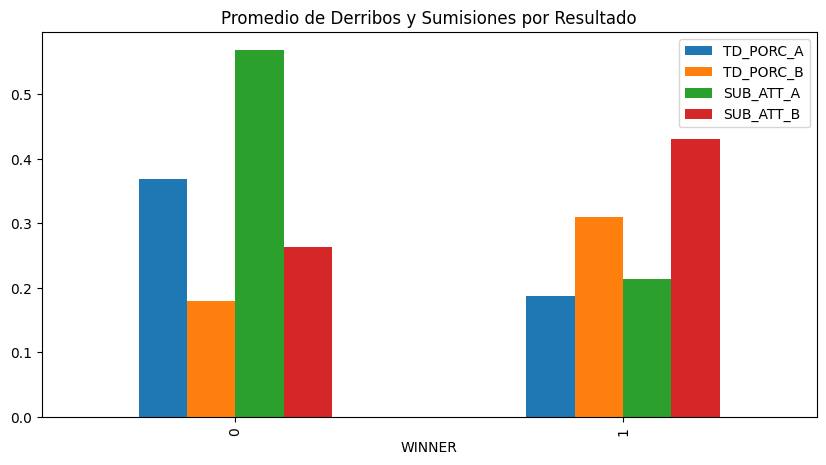

In [21]:
# Analizar si los intentos de derribo o sumisión afectan el resultado
df[['WINNER', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B']].groupby('WINNER').mean().plot(kind='bar', figsize=(10,5))
plt.title("Promedio de Derribos y Sumisiones por Resultado")
plt.show()


In [19]:
# Asegurar que la fecha esté en formato datetime y ordenar por fecha
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values(by="DATE")

# Lista de estadísticas a acumular
stats = ["KD_A", "KD_B", "SIG_STR_A", "SIG_STR_B", "TD_PORC_A", "TD_PORC_B", "SUB_ATT_A","SUB_ATT_B", "REV", "CTRL", 
         "TOTAL_STR_A_x", "TOTAL_STR_A_y", "TOTAL_STR_B_x", "TOTAL_STR_B_y",
         "TD_A_x", "TD_A_y", "TD_B_x", "TD_B_y",
         "STR_HEAD_A_x", "STR_HEAD_A_y", "STR_HEAD_B_x", "STR_HEAD_B_y",
         "STR_BODY_A_x", "STR_BODY_A_y", "STR_BODY_B_x", "STR_BODY_B_y",
         "STR_LEG_A_x", "STR_LEG_A_y", "STR_LEG_B_x", "STR_LEG_B_y",
         "STR_DISTANCE_A_x", "STR_DISTANCE_A_y", "STR_DISTANCE_B_x", "STR_DISTANCE_B_y",
         "STR_CLINCH_A_x", "STR_CLINCH_A_y", "STR_CLINCH_B_x", "STR_CLINCH_B_y",
         "STR_GROUND_A_x", "STR_GROUND_A_y", "STR_GROUND_B_x", "STR_GROUND_B_y"]

# Crear nuevas columnas acumulativas para cada peleador
acumulated_stats = []

for stat in stats:
    if "_A" in stat:  # Si la estadística pertenece al peleador A
        peleador = "Peleador_A"
    elif "_B" in stat:  # Si la estadística pertenece al peleador B
        peleador = "Peleador_B"
    else:
        continue  # Si no tiene _A o _B, la ignoramos
    
    # Calcular la media acumulativa incluyendo la pelea actual
    df[f"{stat}_mean"] = df.groupby(peleador, group_keys=False)[stat].expanding().mean().reset_index(level=0, drop=True)
    
    # Redondear a dos decimales
    df[f"{stat}_mean"] = df[f"{stat}_mean"].round(2)
    
    acumulated_stats.append(f"{stat}_mean")

# Crear un nuevo DataFrame solo con las estadísticas acumuladas
df_acumulado = df[["Peleador_A", "Peleador_B", "DATE", "WINNER"] + acumulated_stats]

df_acumulado


,Peleador_A,Peleador_B,DATE,WINNER,KD_A_mean,KD_B_mean,SIG_STR_A_mean,SIG_STR_B_mean,TD_PORC_A_mean,TD_PORC_B_mean,...,STR_DISTANCE_B_x_mean,STR_DISTANCE_B_y_mean,STR_CLINCH_A_x_mean,STR_CLINCH_A_y_mean,STR_CLINCH_B_x_mean,STR_CLINCH_B_y_mean,STR_GROUND_A_x_mean,STR_GROUND_A_y_mean,STR_GROUND_B_x_mean,STR_GROUND_B_y_mean
0,Laverne Clark,Frank Caracci,1999-01-08,0,0.0,0.00,0.50,0.00,1.00,0.00,...,0.00,2.00,0.00,0.00,0.0,0.00,14.00,26.00,0.00,0.00
1,Evan Tanner,Darrel Gholar,1999-01-08,0,0.0,0.00,0.64,0.15,1.00,1.00,...,0.00,14.00,14.00,21.00,0.0,0.00,0.00,0.00,4.00,12.00
2,Mikey Burnett,Townsend Saunders,1999-01-08,0,1.0,0.00,0.31,0.53,0.00,0.00,...,20.00,45.00,19.00,37.00,14.0,18.00,2.00,9.00,0.00,0.00
3,Tito Ortiz,Jerry Bohlander,1999-01-08,0,0.0,0.00,0.48,0.36,0.85,0.00,...,7.00,20.00,7.00,12.00,1.0,4.00,18.00,35.00,1.00,1.00
4,Pedro Rizzo,Mark Coleman,1999-01-08,0,0.0,0.00,0.55,0.47,0.00,0.33,...,7.00,23.00,1.00,1.00,0.0,1.00,0.00,0.00,18.00,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,Jake Matthews,Francisco Prado,2025-02-15,0,0.2,0.25,0.43,0.45,0.31,0.04,...,45.00,120.25,3.40,5.00,3.5,4.00,9.93,13.53,5.25,6.75
7839,Jimmy Crute,Rodolfo Bellato,2025-02-15,1,0.5,0.00,0.48,0.63,0.31,0.50,...,85.00,136.00,4.75,5.50,4.0,5.00,5.38,8.00,0.00,0.00
7840,Justin Tafa,Tallison Teixeira,2025-02-15,1,0.5,1.00,0.49,0.88,0.00,0.00,...,1.00,2.00,1.83,2.33,3.0,3.00,1.00,1.17,4.00,4.00
7832,Quillan Salkilld,Anshul Jubli,2025-02-15,0,1.0,0.00,0.85,0.42,0.00,0.13,...,34.33,65.33,0.00,0.00,2.0,4.33,1.00,1.00,10.67,12.33


In [20]:
df_acumulado[(df_acumulado["Peleador_A"] == "Ilia Topuria") | (df_acumulado["Peleador_B"] == "Ilia Topuria")]


,Peleador_A,Peleador_B,DATE,WINNER,KD_A_mean,KD_B_mean,SIG_STR_A_mean,SIG_STR_B_mean,TD_PORC_A_mean,TD_PORC_B_mean,...,STR_DISTANCE_B_x_mean,STR_DISTANCE_B_y_mean,STR_CLINCH_A_x_mean,STR_CLINCH_A_y_mean,STR_CLINCH_B_x_mean,STR_CLINCH_B_y_mean,STR_GROUND_A_x_mean,STR_GROUND_A_y_mean,STR_GROUND_B_x_mean,STR_GROUND_B_y_mean
5623,Youssef Zalal,Ilia Topuria,2020-10-10,1,0.50,0.00,0.45,0.39,0.30,0.55,...,12.00,30.00,1.50,2.50,1.00,2.00,6.00,10.00,0.00,1.00
5712,Ilia Topuria,Damon Jackson,2020-12-05,0,1.00,0.00,0.49,0.38,0.00,0.19,...,8.00,27.25,0.00,2.00,2.75,4.25,1.00,1.00,2.50,3.50
6000,Ryan Hall,Ilia Topuria,2021-07-10,1,0.00,0.00,0.58,0.48,0.00,0.28,...,7.50,19.00,0.00,0.00,0.50,1.00,1.00,1.00,7.50,12.50
6354,Jai Herbert,Ilia Topuria,2022-03-19,1,1.00,0.33,0.34,0.48,0.00,0.27,...,9.67,24.33,1.00,1.00,1.00,1.33,2.00,3.00,6.33,9.67
6737,Bryce Mitchell,Ilia Topuria,2022-12-10,1,0.00,0.50,0.63,0.48,0.53,0.20,...,14.50,34.25,0.40,0.80,1.50,2.00,12.60,16.20,6.75,9.50
7002,Josh Emmett,Ilia Topuria,2023-06-24,1,0.75,0.60,0.39,0.48,0.21,0.36,...,34.40,85.20,5.00,6.38,1.60,2.00,6.00,8.12,12.60,18.20
7327,Alexander Volkanovski,Ilia Topuria,2024-02-17,1,0.22,0.67,0.58,0.47,0.33,0.30,...,33.33,82.67,9.11,13.33,2.00,2.33,22.56,33.67,11.00,15.67
7705,Ilia Topuria,Max Holloway,2024-11-02,0,1.00,0.42,0.50,0.41,0.50,0.00,...,71.50,174.92,0.00,1.00,3.92,5.08,2.50,2.50,4.92,7.42
